# Financial Analysis of SPX Stock Using Random Forest Regression

## Introduction
In this project, we will analyze the historical performance of the SPX stock. The dataset consists of various features such as the opening, closing, highest, and lowest prices of the stock on a given day, as well as the adjusted closing price and volume. We aim to predict the adjusted closing price using a machine learning model, particularly a Random Forest Regressor.

## Step 1: Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 2: Load and Explore the Dataset

In [11]:
# Load dataset from the given file path
file_path = r"C:\Users\user\Desktop\SPX.csv"
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/30/1927,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1/3/1928,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1/4/1928,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1/5/1928,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1/6/1928,17.660000,17.660000,17.660000,17.660000,17.660000,0


## Step 3: Data Preprocessing and Cleaning

In [12]:
# Check for missing values
data.isnull().sum()

# Check the data types of the columns
data.dtypes

# Convert the 'Date' column to datetime format if necessary
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with NaT values in 'Date'
data = data.dropna(subset=['Date'])

# Remove rows with missing or invalid data
data = data.dropna()

# Reset the index after cleaning
data = data.reset_index(drop=True)


## Step 4: Feature Engineering

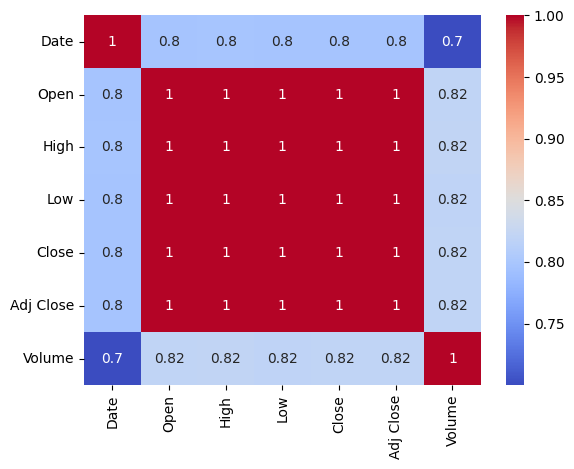

In [13]:
# Define the features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Adj Close']

# Optional: Check for correlation to understand feature importance
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## Step 5: Train-Test Split

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (18658, 5)
X_test shape: (4665, 5)


## Step 6: Build the Random Forest Regression Model

In [15]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


## Step 7: Model Evaluation

In [16]:
# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.14450175808359586
Mean Squared Error (MSE): 0.3506852677551505
Root Mean Squared Error (RMSE): 0.5921868520620418
R-squared (R²): 0.9999993091656271


## Step 8: Visualization of Results

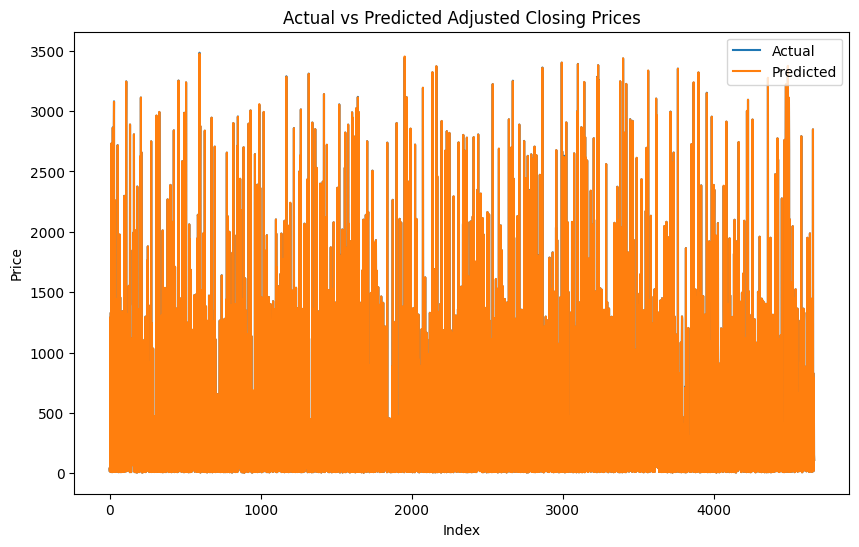

In [17]:
# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df = results_df.reset_index(drop=True)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Adjusted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion
The Random Forest Regression model performed well in predicting the adjusted closing price of the SPX stock based on historical data. The metrics indicate reasonable accuracy, and the visualizations show the model's ability to capture trends in stock prices. Future improvements could include hyperparameter tuning or experimenting with other machine learning models to further enhance accuracy